In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import sys

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import dlib
import face_recognition # Dlib library
import cv2

http://shikouno.hatenablog.com/entry/20171001/1506862903 参考

## opencv画像プロット

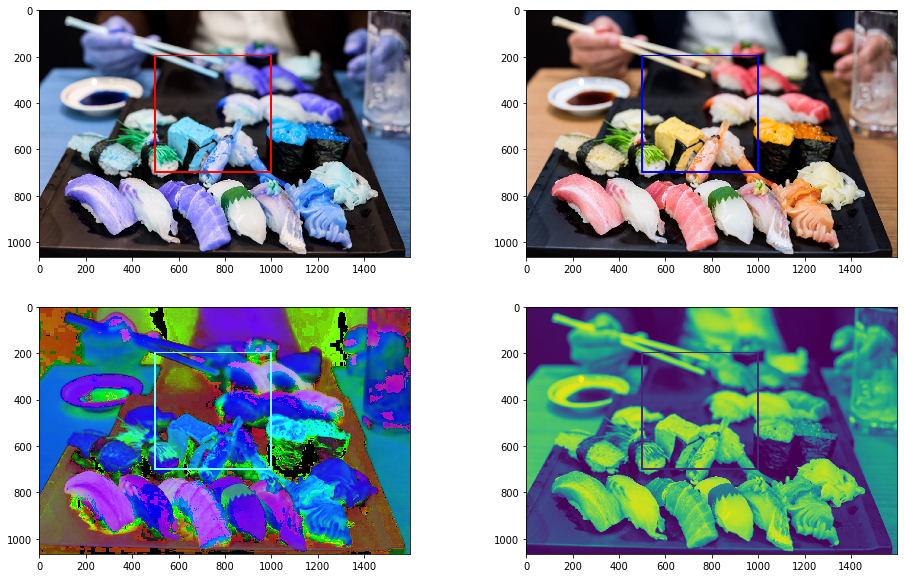

In [2]:
img_name = "sushi.jpg"
img = cv2.imread(img_name) # 画像を読み込む

x, y, width, height = (500, 200, 500, 500) # 矩形のサイズ
rect_color = (255, 0, 0) # 矩形の色 (B=0, G=255, R=0)
cv2.rectangle(img, (x, y), (x + width, y + height), rect_color, thickness=5) # 矩形の描写 

plt.figure(figsize=(16,10))

plt.subplot(221)
plt.imshow(img) #matplotlibで画像描写

plt.subplot(222)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # 画像の色変換
plt.imshow(img1)

plt.subplot(223)
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img2)

plt.subplot(224)
img3 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img3)

## 顔検出器を比較する関数

In [8]:
def compare_face_recognition(img_name):
    #read image by opencv
    img = cv2.imread(img_name) 
    img_result = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #結果出力用

    #open_cv haarcascade
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # グレースケール化
    cascade_path = "./haarcascades/haarcascade_frontalface_alt.xml"
    cascade = cv2.CascadeClassifier(cascade_path) # detectorを作成
    cascade_locations = cascade.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=1) # 顔認識とパラメーター

    rect_color = (0, 255, 0) #緑の矩形で囲む
    if len(cascade_locations) > 0:
        for x, y, width, height in cascade_locations:
            cv2.rectangle(img_result, (x, y), (x + width, y + height), rect_color, thickness=2)
            
    #open_cv lbpcascade
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # グレースケール化
    cascade_path = "./lbpcascades/lbpcascade_frontalface_improved.xml"
    cascade = cv2.CascadeClassifier(cascade_path) # detectorを作成
    cascade_locations = cascade.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=1) # 顔認識とパラメーター

    rect_color = (255, 0, 255) #紫の矩形で囲む
    if len(cascade_locations) > 0:
        for x, y, width, height in cascade_locations:
            cv2.rectangle(img_result, (x, y), (x + width, y + height), rect_color, thickness=2)

    # Dlib
    dlib_img = face_recognition.load_image_file(img_name)
    # Dlib hog+svm
    hogsvm_locations = face_recognition.face_locations(dlib_img) #hog+svmモデルで顔認識
    
    rect_color = (0, 0, 255) #青の矩形で囲む
    if len(hogsvm_locations) > 0:
        for top, left, bottom, right in hogsvm_locations:
            cv2.rectangle(img_result, (left, top), (right, bottom), rect_color, thickness=2)

    # Dlib CNN        
    cnn_locations = face_recognition.face_locations(dlib_img, model="cnn") #CNNモデルで顔認識
    
    rect_color = (255, 0, 0) #赤の矩形で囲む
    if len(cnn_locations) > 0:
        for top, left, bottom, right in cnn_locations:
            cv2.rectangle(img_result, (left, top), (right, bottom), rect_color, thickness=2)
    
    return img_result

## 各写真で顔検出

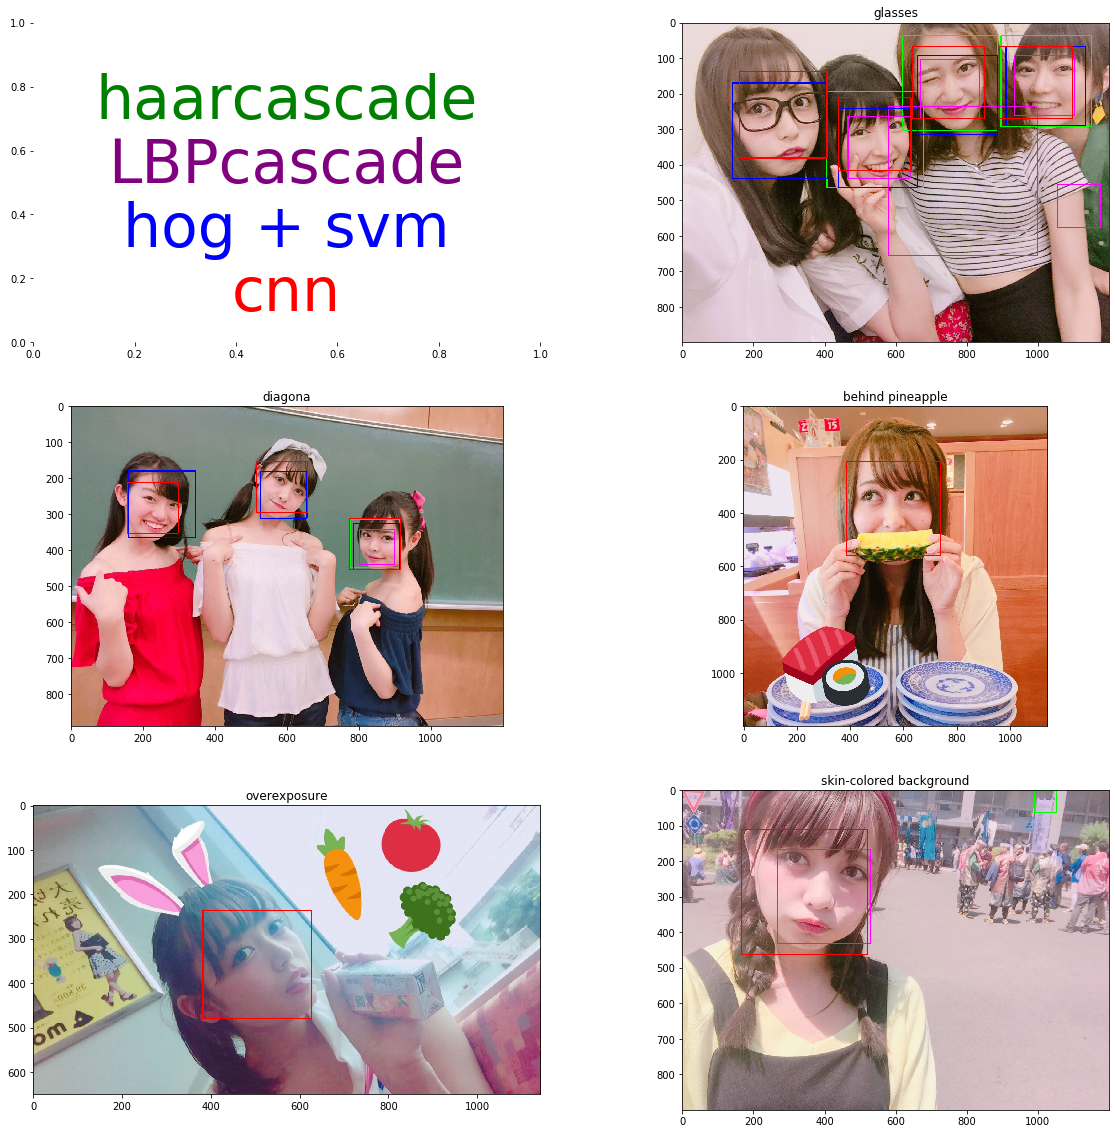

In [13]:
plt.figure(figsize=(20,20))

ax = plt.subplot(321)
ax.spines["right"].set_color("none")
ax.spines["left"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines["bottom"].set_color("none")
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.text(0.5, 0.7, 'haarcascade', color = "green", fontsize=60, horizontalalignment="center")
ax.text(0.5, 0.5, 'LBPcascade', color = "purple", fontsize=60, horizontalalignment="center")
ax.text(0.5, 0.3, 'hog + svm', color = "blue", fontsize=60, horizontalalignment="center")
ax.text(0.5, 0.1, 'cnn', color = "red", fontsize=60, horizontalalignment="center")

plt.subplot(322)
plt.title("glasses")
plt.imshow(compare_face_recognition("girls.jpg"))

plt.subplot(323)
plt.title("diagona")
plt.imshow(compare_face_recognition("girls1.jpg"))

plt.subplot(324)
plt.title("behind pineapple")
plt.imshow(compare_face_recognition("girls2.jpg"))

plt.subplot(325)
plt.title("overexposure")
plt.imshow(compare_face_recognition("girls3.jpg"))

plt.subplot(326)
plt.title("skin-colored background")
plt.imshow(compare_face_recognition("girls4.jpg"))

## 顔検出器の速度比較

In [5]:
%%time

#open_cv haarcascade
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # グレースケール化
cascade_path = "./haarcascades/haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_path) # detectorを作成
cascade_locations = cascade.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=1) # 顔認識とパラメーター

CPU times: user 1.75 s, sys: 41.8 ms, total: 1.79 s
Wall time: 563 ms


In [12]:
%%time

#open_cv LBPcascade
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # グレースケール化
cascade_path = "./lbpcascades/lbpcascade_frontalface_improved.xml"
cascade = cv2.CascadeClassifier(cascade_path) # detectorを作成
cascade_locations = cascade.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=1) # 顔認識とパラメーター

CPU times: user 760 ms, sys: 36.1 ms, total: 796 ms
Wall time: 328 ms


In [6]:
%%time

# Dlib API
dlib_img = face_recognition.load_image_file(img_name)
# Dlib hog+svm
hogsvm_locations = face_recognition.face_locations(dlib_img) #hog+svmモデルで顔認識

CPU times: user 780 ms, sys: 40.2 ms, total: 820 ms
Wall time: 801 ms


In [7]:
%%time

# Dlib API
dlib_img = face_recognition.load_image_file(img_name)
# Dlib CNN        
cnn_locations = face_recognition.face_locations(dlib_img, model="cnn") #CNNモデルで顔認識

CPU times: user 16.4 s, sys: 21.7 s, total: 38.1 s
Wall time: 23.5 s


## 参考にしたサイト

http://qiita.com/donksite/items/f500d301bc192efcec70  
http://ai-coordinator.jp/opencv_face  
https://github.com/ageitgey/face_recognition  